In [ ]:
!pip install "pycaret[analysis]"

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1000, 'display.width', 1000, 'display.max_rows',1000)


In [2]:
# df_original = pd.read_excel("Fonte_minimal1.xlsx").set_index("Series Name")
df_t = pd.read_excel("Fonte_original_sem_2023.xlsx").set_index("Year")

In [3]:
from pycaret.regression import RegressionExperiment

# setup experiment
s = RegressionExperiment()
s.setup(
    df_t,
    target="Individuals using the Internet (% of population)",
    session_id=123,
    normalize=True,
    transform_target=True,
    # remove_multicollinearity=True,
)

,Description,Value
0,Session id,123
1,Target,Individuals using the Internet (% of population)
2,Target type,Regression
3,Original data shape,"(33, 68)"
4,Transformed data shape,"(33, 68)"
5,Transformed train set shape,"(23, 68)"
6,Transformed test set shape,"(10, 68)"
7,Numeric features,67
8,Rows with missing values,97.0%
9,Preprocess,True


In [4]:
# train all models and compare them
best_model = s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,4.3225,36.4076,5.4543,0.8286,0.2596,1.5356,0.1280
knn,K Neighbors Regressor,6.2068,79.1177,8.1386,0.7981,0.3314,3.1401,0.1000
par,Passive Aggressive Regressor,5.0428,67.6950,6.6123,0.7967,0.2263,1.1299,0.1290
rf,Random Forest Regressor,6.4845,116.4639,8.4678,0.7937,0.2939,5.9522,0.2070
ridge,Ridge Regression,5.1991,76.2112,6.7825,0.7478,0.2100,2.6767,0.0530
xgboost,Extreme Gradient Boosting,4.4120,46.2899,5.4689,0.7441,0.2618,0.3433,0.1340
en,Elastic Net,6.0224,82.7473,7.7276,0.7440,0.4712,20.4565,0.0530
huber,Huber Regressor,5.3952,86.4207,7.0701,0.7350,0.2177,2.6560,0.2350
lr,Linear Regression,5.9757,104.6776,7.8720,0.7325,0.2393,3.3136,1.2420
br,Bayesian Ridge,5.9757,104.6743,7.8719,0.7325,0.2393,3.3136,0.1070


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [5]:
# show best model found
print(best_model)

AdaBoostRegressor(random_state=123)


In [6]:
# get best model metrics
s.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

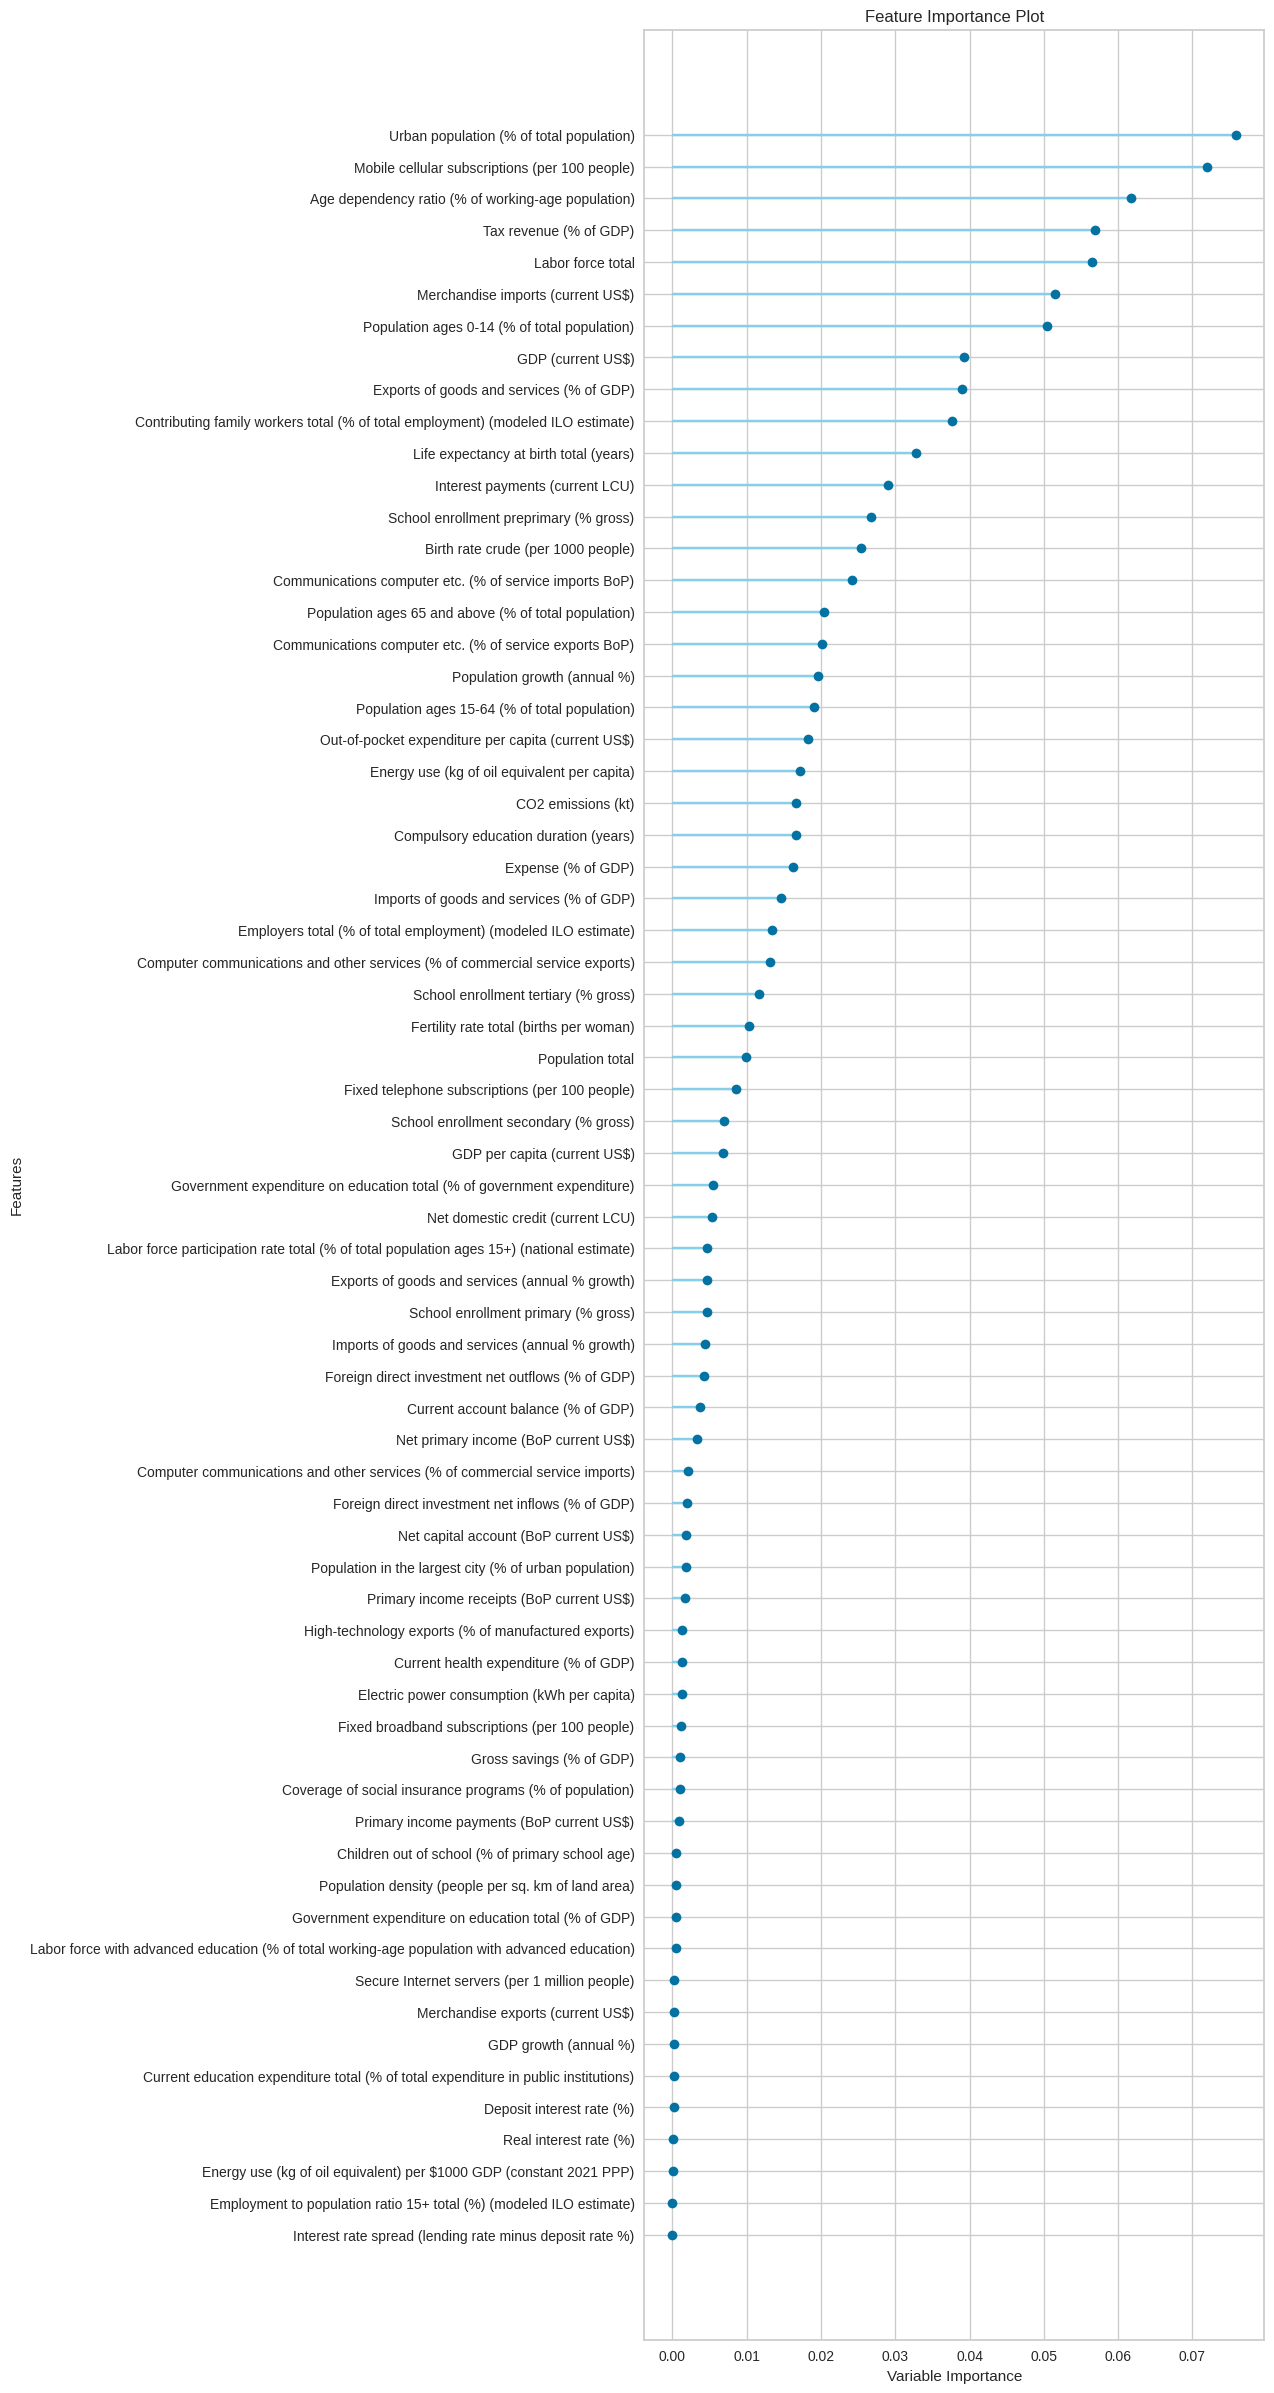

In [7]:
# feature importance plot
s.plot_model(best_model, plot = 'feature_all')